# Autism Screening Classification

## Data Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Grab the data
data = pd.read_csv('./data/autism_data.arff', na_values="?")

In [3]:
# Basic info
print(data.shape, "\n")
print(data.info(), "\n")
data.head(10)

(704, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  resu

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES


In [4]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull()

# Sum the missing vlaues for each column
missing_counts = missing_values.sum()
print("Missing Value Counts: ")
print(missing_counts)

Missing Value Counts: 
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


In [5]:
# Get Summary Stats
print(data.describe())

         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  704.000000  704.000000  704.000000  704.000000  704.000000  704.000000   
mean     0.721591    0.453125    0.457386    0.495739    0.498580    0.284091   
std      0.448535    0.498152    0.498535    0.500337    0.500353    0.451301   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age      result  
count  704.000000  704.000000  704.000000  704.000000  702.000000  704.000000  
mean     0.417614    0.649148    0.323864    0.573864   29.698006    4.875000  
std      0.493516    0.477576 

## Data Visualization

In [6]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Bar Plot of Age Distribution

/Users/brihan/.local/share/virtualenvs/AutismScreening-qUv85un8/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brihan/.local/share/virtualenvs/AutismScreening-qUv85un8/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


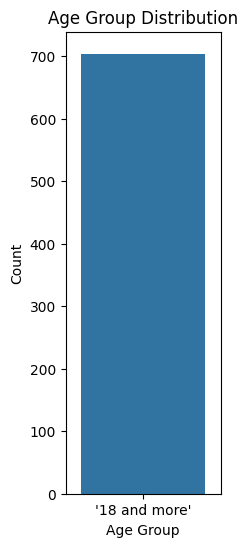

In [7]:
plt.figure(figsize=(2, 6))
sns.countplot(data=data, x='age_desc', order=data['age_desc'].value_counts().index)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

***Note: Since everyone is in the same age_desc group, we can remove this predictor.***

### 2. Bar Plot of Gender Distribution

/Users/brihan/.local/share/virtualenvs/AutismScreening-qUv85un8/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brihan/.local/share/virtualenvs/AutismScreening-qUv85un8/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


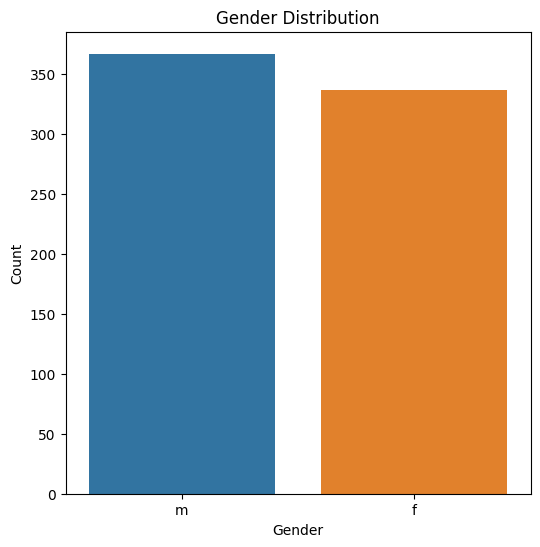

In [8]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='gender', order=data['gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 3. Bar Plot of Class/ASD (what we are predicting for)

/Users/brihan/.local/share/virtualenvs/AutismScreening-qUv85un8/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brihan/.local/share/virtualenvs/AutismScreening-qUv85un8/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


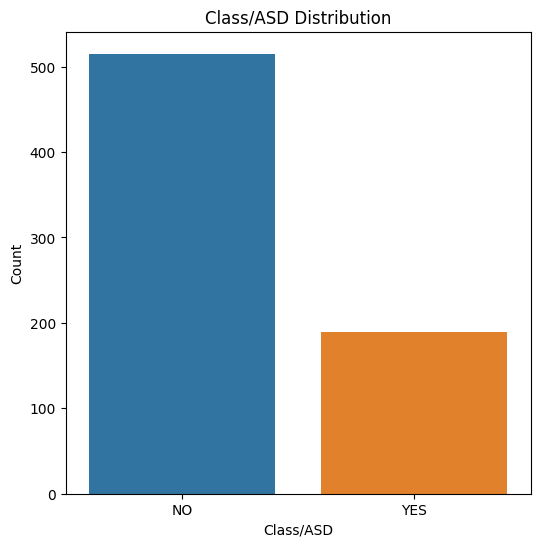

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Class/ASD', order=data['Class/ASD'].value_counts().index)
plt.title('Class/ASD Distribution')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

***Note: Because the data is imbalanced, we will be using a Deep Learning Approach to predict the result.***

## Data Preprocessing

In [10]:
# Remove age desc from predictors
skinny_data = data.drop('age_desc', axis=1)
skinny_data.dropna(subset=['age'], inplace=True)

skinny_data.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,NaN,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,Others,yes,no,'United States',no,9,Self,YES
6,0,1,0,0,0,0,0,1,0,0,17.0,f,Black,no,no,'United States',no,2,Self,NO
7,1,1,1,1,0,0,0,0,1,0,64.0,m,White-European,no,no,'New Zealand',no,5,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,29.0,m,White-European,no,no,'United States',no,6,Self,NO
9,1,1,1,1,0,1,1,1,1,0,17.0,m,Asian,yes,yes,Bahamas,no,8,'Health care professional',YES


In [11]:
# Change binary columns to numbers
pruned_binary_data = skinny_data.copy()

# Change 'm' to 1 and 'f' to 0
pruned_binary_data['gender'] = pruned_binary_data['gender'].map({'m': 1, 'f': 0})

# Changed 'yes' to 1 and 'no' to 0
binary_columns = ['jundice', 'austim', 'used_app_before', 'Class/ASD']

for col in binary_columns:
    pruned_binary_data[col] = pruned_binary_data[col].astype(str).str.lower().map({'yes': 1, 'no': 0})

pruned_binary_data.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,White-European,0,0,'United States',0,6,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,Latino,0,1,Brazil,0,5,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,Latino,1,1,Spain,0,8,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,White-European,0,1,'United States',0,6,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,NaN,0,0,Egypt,0,2,NaN,0
5,1,1,1,1,1,0,1,1,1,1,36.0,1,Others,1,0,'United States',0,9,Self,1
6,0,1,0,0,0,0,0,1,0,0,17.0,0,Black,0,0,'United States',0,2,Self,0
7,1,1,1,1,0,0,0,0,1,0,64.0,1,White-European,0,0,'New Zealand',0,5,Parent,0
8,1,1,0,0,1,0,0,1,1,1,29.0,1,White-European,0,0,'United States',0,6,Self,0
9,1,1,1,1,0,1,1,1,1,0,17.0,1,Asian,1,1,Bahamas,0,8,'Health care professional',1


In [12]:
# Change binary columns to numbers
pruned_xary_data = pruned_binary_data.copy()

xary_cols = ['ethnicity', 'contry_of_res', 'relation']
pruned_xary_data = pd.get_dummies(pruned_xary_data, columns=xary_cols, prefix=xary_cols)

all_cols = pruned_xary_data.columns
dummy_cols = []

for col in all_cols:
    for xary_col in xary_cols:
        if xary_col in col:
            dummy_cols.append(col)

for col in dummy_cols:
    pruned_xary_data[col] = pruned_xary_data[col].map({True: 1, False: 0})

In [13]:
# Check which columns do not contain values between 0s and 1s
are_all_values_between_zero_and_one = (pruned_xary_data >= 0) & (pruned_xary_data <= 1)

if are_all_values_between_zero_and_one.all().all():
    print("All values in the DataFrame are between 0 and 1.")
else:
    print("Columns with values not between 0 and 1:")
    columns_with_values_not_between_zero_and_one = pruned_xary_data.columns[~are_all_values_between_zero_and_one.all()]
    print(columns_with_values_not_between_zero_and_one.tolist())

Columns with values not between 0 and 1:
['age', 'result']


## Data Preparation

In [14]:
# Split data into features and targets
X = pruned_xary_data.drop(columns='Class/ASD', axis=1)
y = pruned_xary_data['Class/ASD']

In [15]:
# Turn X and y into numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [16]:
# Normalize the data, because we know that 'age' and 'result' are still not between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [17]:
# Check whether everything is between 0 and 1
are_all_values_between_zero_and_one = (X >= 0) & (X <= 1)

if are_all_values_between_zero_and_one.all().item():
    print("All data is between 0 and 1.")
else:
    print("Not all data is between 0 and 1.")

All data is between 0 and 1.


In [18]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
# Create Tensors & DataLoaders
import torch

train_ds = torch.utils.data.TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
valid_ds = torch.utils.data.TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test).float())

train_dl = torch.utils.data.DataLoader(train_ds, batch_size=100)
valid_dl = torch.utils.data.DataLoader(valid_ds, batch_size=100)

## Model Building

In [20]:
import torch.nn as nn
import torch.optim as optim

In [21]:
# Create the Model

class AutismClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, 64)
        self.l2 = nn.Linear(64, 32)
        self.l3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.sigmoid(self.l3(x))
        return x.squeeze()

n_inputs = X_train.shape[1]
model = AutismClassifier(n_inputs)

In [22]:
# Loss function and optimizer
loss_func = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [23]:
def loss_calc(xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    if opt is not None:
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss.item(), len(xb)

EPOCHS = 1000

for epoch in range(EPOCHS):
    model.train()
    
    for xb, yb in train_dl:
        loss_calc(xb, yb, optimizer)
        
    model.eval()
    
    with torch.no_grad():
        losses, nums = zip(*[loss_calc(xb, yb) for xb, yb in valid_dl])
        
    val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
    print(epoch, val_loss)

0 0.6641673551383593
1 0.662279281210392
2 0.6599298352045371
3 0.6573819725226003
4 0.6547797360318772
5 0.6521970312646095
6 0.6496679596867122
7 0.647211621416376
8 0.6448333428261128
9 0.6425360090343665
10 0.6403193630225269
11 0.6381820516383394
12 0.636118176558339
13 0.6341251553373134
14 0.632199837383649
15 0.6303381974815477
16 0.6285378522906743
17 0.6267972030538194
18 0.625112955874585
19 0.62348487909804
20 0.6219104160653784
21 0.6203817581454067
22 0.6189001747902404
23 0.6174620812666332
24 0.6160651022660817
25 0.6147075325039262
26 0.6133872443902577
27 0.6121038346425861
28 0.610857072451436
29 0.6096454888370866
30 0.6084646147193639
31 0.6073159186552602
32 0.6061976006690492
33 0.6051082835129812
34 0.6040431967018344
35 0.6030011282744983
36 0.60198165043026
37 0.600985161378874
38 0.6000108989417976
39 0.5990575657668689
40 0.5981259616554206
41 0.5972102504250005
42 0.5963129866207745
43 0.5954354587176167
44 0.5945771285828124
45 0.593733309008551
46 0.59290

## Testing the Model

In [24]:
from sklearn import metrics
y_pred = model(torch.tensor(X_test).float()).detach().numpy()

y_pred[y_pred>=0.5] =1.0
y_pred[y_pred<0.5] =0.0

print('Confusion matrix: (Actual on X, Predicted on Y) \n {} \n'. format(metrics.confusion_matrix(y_test, y_pred)))
print('AUPRC score: {} \n'. format(metrics.average_precision_score(y_test, y_pred)))
print('AUROC score: {} \n'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Accuracy score: {} \n'.format(metrics.accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred))

Confusion matrix: (Actual on X, Predicted on Y) 
 [[102   2]
 [  1  36]] 

AUPRC score: 0.9288560677138504 

AUROC score: 0.9768711018711018 

Accuracy score: 0.9787234042553191 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       104
           1       0.95      0.97      0.96        37

    accuracy                           0.98       141
   macro avg       0.97      0.98      0.97       141
weighted avg       0.98      0.98      0.98       141



## Quick Conclusion

The evaluation results of our model showcase its strong performance in classifying autism spectrum disorder (ASD), with an overall accuracy score of approximately 97.87%. The confusion matrix reveals that the model correctly predicted 102 cases of no ASD and 36 cases of ASD, with only a few misclassifications. This demonstrates a high level of precision and recall for both classes.

The area under the precision-recall curve (AUPRC) score of 0.93 highlights the model's ability to provide reliable predictions, especially in scenarios where class imbalances are present. Additionally, the area under the receiver operating characteristic curve (AUROC) score of 0.98 indicates the model's effectiveness in distinguishing between the two classes.

Looking at the classification report, we observe that the model excels in precision and recall for both no ASD and ASD. This suggests that the model has a strong ability to identify true positives while minimizing false positives and false negatives. The weighted average F1-score of 0.98 reinforces the model's robustness in capturing the trade-off between precision and recall.

In summary, our model demonstrates outstanding performance in classifying the target variable, achieving high accuracy, precision, recall, and F1-score. These results indicate that the model is well-suited for its intended task and can provide valuable insights for decision-making in the relevant domain.